# House Price Regression 

##  <font color='Grey'> Project Outline 

1. Exploratory Data Analysis
2. Feature Engineering
3. Feature Selection 
4. Modelling 

## <font color='Blue'>1. Exploratory Data Analysis</font>

#### <font color='green'>1.1 Importing and Exploring Dataset and its features</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Removing pandas limitation of number of columns displayed as data has lot of features
pd.pandas.set_option('display.max_columns', None)

In [2]:
#Importing the dataset
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#printing out dataset dimensions 
data_row = data.shape[0]
data_col = data.shape[1]
print('The train data set has', data_row, 'rows and', data_col,'columns' )

The train data set has 1460 rows and 81 columns


The dataset has 80 different numerical and categorical features & 1 target variable i.e. SalePrice. There are 1460 records 

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Using these columns datatypes the features can be divided into groups of numercial and categorical variables to make EDA much easier to structure and understand


In [7]:
#Generating a list of numerical columns
num_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
num_features.remove('SalePrice')
print('Number of numerical features is', len(num_features))

data[num_features].head()

Number of numerical features is 37


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


In [8]:
#Generating a list of categorical data
cat_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

print('Number of categorical features is', len(cat_features))

data[cat_features].head()

Number of categorical features is 43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Before moving on, it would also be quite important which of these columns have NaN values, so that during EDA inferences can be made to understand what to do with these NaN values

In [9]:
#Generating a plot to show no. of NaN values for specific columns
null_val = data.isnull().sum()
null_val = null_val[null_val > 0]
null_val.sort_values(inplace = True)
null_val

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

<AxesSubplot:>

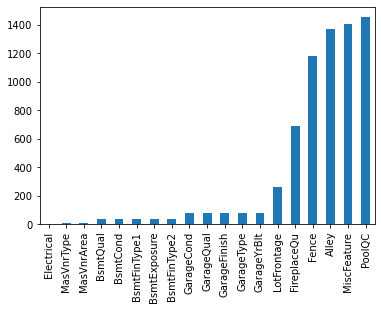

In [10]:
null_val.plot.bar()

5 features have majority of the NaN values (i.e. FireplaceQu , Fence, Alley MiscFeature, PoolQC ), while these NaN values will be delt with later it is imperative to understand these features to obtain an idea on how to deal/impute values for the ones which have NaN values.

#### <font color='green'>1.3 Output Variable SalePrice EDA</font>

In [11]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

There are no NaN values in SalePrice. The mean is around ~ 180,000 whereas the median is ~ 180,000. Therefore a positive skew is expected. The max values is 775000 which is a lot larger than the upperfence which is ~340,000. Therefore a long tail is also expected

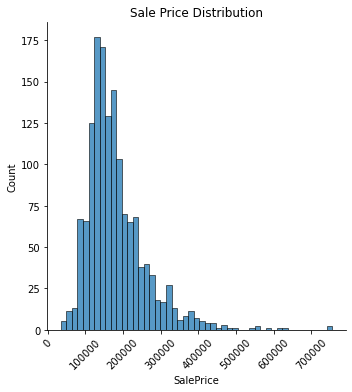

In [12]:
sns.displot(data['SalePrice'], kde = False)
plt.title('Sale Price Distribution')
plt.xticks(rotation = 45)
plt.show()

As expected the SalePrice is not normally distributed, it is positively skewed and has a long tail of outliers that would have a huge impact on a loss function minimization regression based algorithm therefore to deal with the values can be transformed to log normal. 

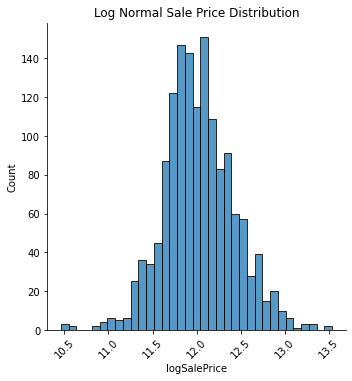

In [13]:
data['logSalePrice'] = np.log(data['SalePrice'])
sns.displot(data['logSalePrice'], kde = False)
plt.title('Log Normal Sale Price Distribution')
plt.xticks(rotation = 45)
plt.show()

Transforming SalePrice to Log Normal leads to a more normally distributed values which would perform better, espescially when using a linear regression model. 

#### <font color='green'>1.4 Temporal Features EDA</font>

There are 4 time based features YearBuilt, YearRemodAdd, GarageYrBlt, YrSold. 

In [14]:
#Generating temporal feature list and removing them from numerical features
temp_features = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
num_features = np.setdiff1d(num_features,temp_features)
data[temp_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [15]:
for feature in temp_features:
    print(feature, data[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

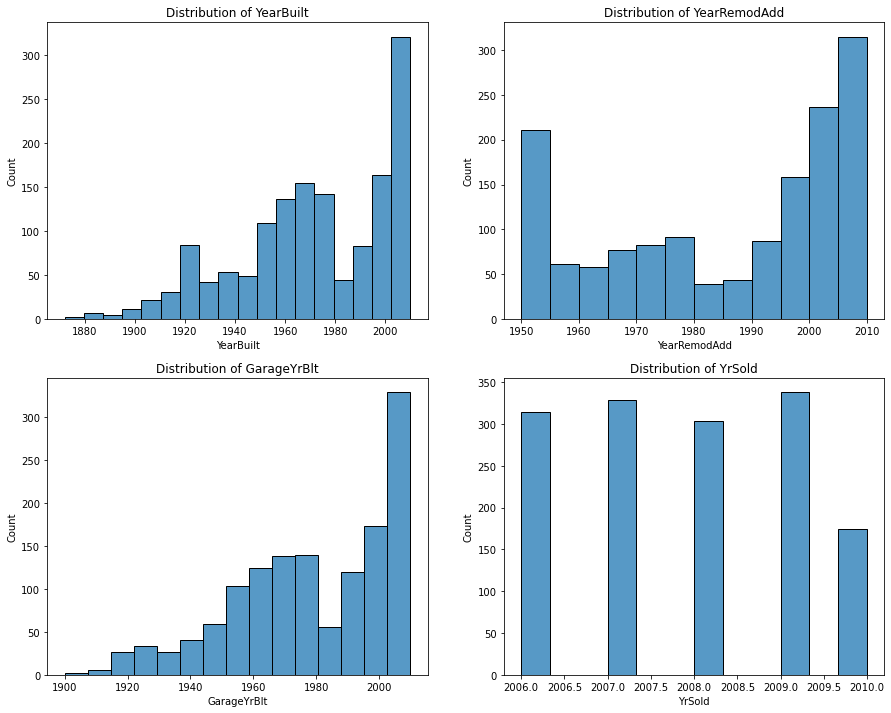

In [16]:
plt.figure(figsize=(15,12))  

for feature in enumerate(temp_features):
    plt.subplot(2,2,feature[0]+1)
    sns.histplot(data[feature[1]])
    plt.title('Distribution of '+ feature[1])

The distributions of YearBuilt and GarageYrBlt are similar, this is understandable because for most houses the year the garage was built would be the year the house was built in. Therefore for modeling using only one of these might be best to yield good results in the linear regression model. YrSold seems to have a sudden dip during the year 2010, which could be explained due to the recession that hit during that time. Similarly its important to under the relationship between these temporal features and SalePrice. 

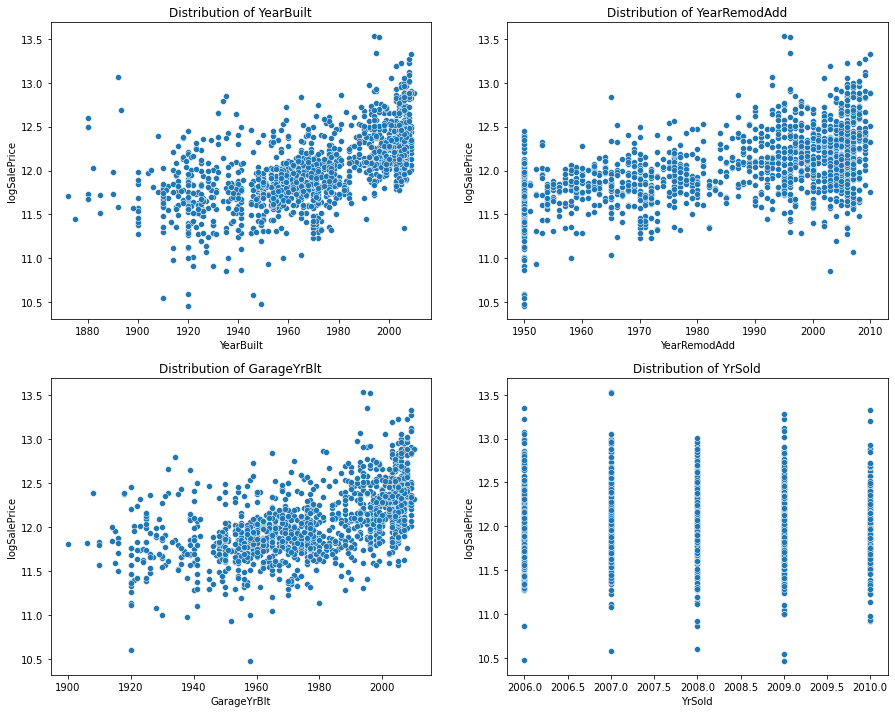

In [17]:
plt.figure(figsize=(15,12))  

for feature in enumerate(temp_features):
    plt.subplot(2,2,feature[0]+1)
    sns.scatterplot(x = data[feature[1]], y = data['logSalePrice'], data = data)
    plt.title('Distribution of '+ feature[1])

YearBuilt, GarageYrBlt and YearRemodAdd all show a relationship with SalePrice. Whereas SalePrice does not seem to vary much with respect to YrSold.  

#### <font color='green'>1.5 Numeric Features EDA</font>

In [18]:
data[num_features].head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF
0,856,854,0,3,706,0,1,0,150,0,0,2,548,2,1710,1,1,1,8450,65.0,0,60,196.0,0,2,61,5,7,0,0,8,856,0
1,1262,0,0,3,978,0,0,1,284,0,1,2,460,2,1262,0,2,1,9600,80.0,0,20,0.0,0,5,0,8,6,0,0,6,1262,298
2,920,866,0,3,486,0,1,0,434,0,1,2,608,2,1786,1,3,1,11250,68.0,0,60,162.0,0,9,42,5,7,0,0,6,920,0
3,961,756,0,3,216,0,1,0,540,272,1,1,642,3,1717,0,4,1,9550,60.0,0,70,0.0,0,2,35,5,7,0,0,7,756,0
4,1145,1053,0,4,655,0,1,0,490,0,1,2,836,3,2198,1,5,1,14260,84.0,0,60,350.0,0,12,84,5,8,0,0,9,1145,192


In [19]:
#removing ID column as it is not useful
to_remove = ['Id']
num_features = np.setdiff1d(num_features,to_remove)

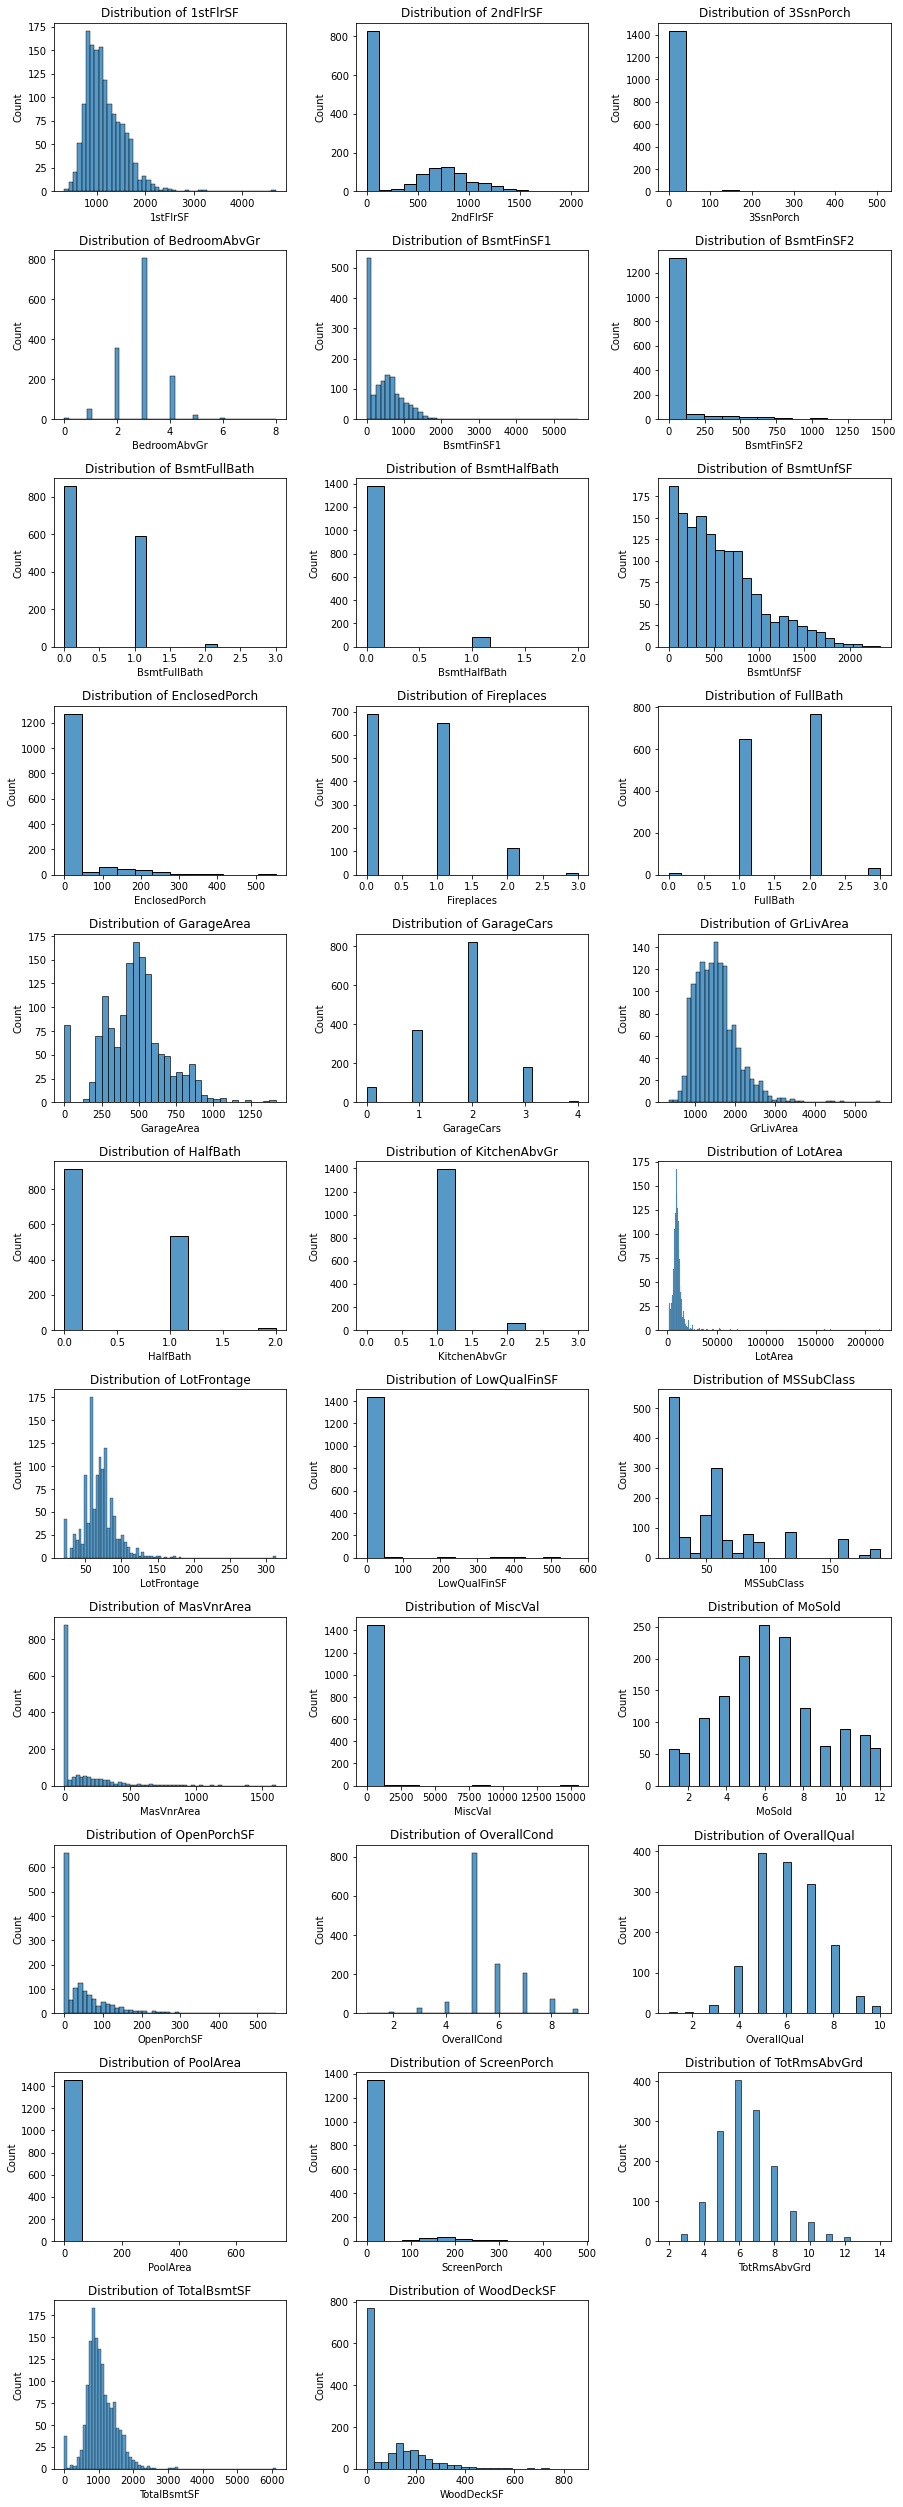

In [20]:
#plotting different numerical features
plt.figure(figsize=(15,45))
plt.subplots_adjust(hspace=0.35, wspace=0.3)

for feature in enumerate(num_features):
    plt.subplot(11,3,feature[0]+1)
    sns.histplot(data[feature[1]])
    plt.title('Distribution of '+ feature[1])

Features such as 1stFlrSF, BsmtFinSF1, GarageArea, GrLivArea, LotArea, LotFrontage, TotoalBsmt and some others have skewed distributions and must be transformed before being fed to a model. 

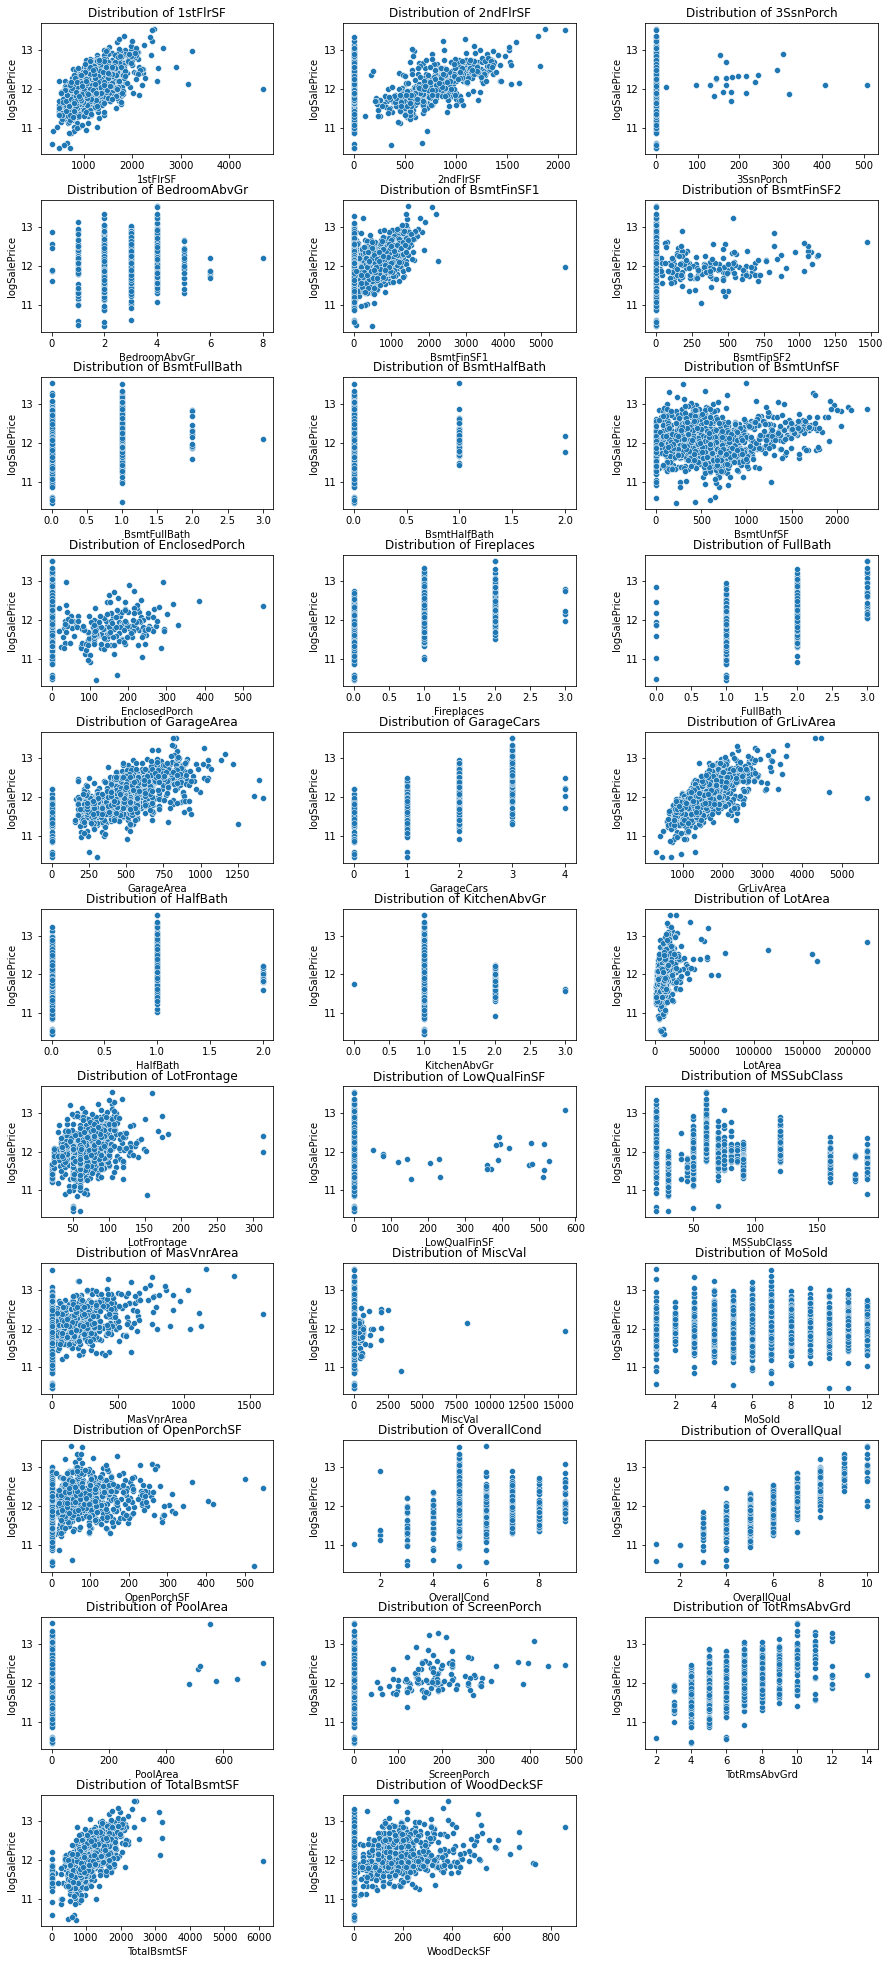

In [21]:
#scatter plots between numerical features and logSalePrice
plt.figure(figsize=(15,35))
plt.subplots_adjust(hspace=0.35, wspace=0.3)

for feature in enumerate(num_features):
    plt.subplot(11,3,feature[0]+1)
    sns.scatterplot(x = data[feature[1]], y = data['logSalePrice'], data = data)
    plt.title('Distribution of '+ feature[1])

There are many features that exhibit a linear relationship with logSalePrice such as 1stFlrSF , 2ndFlrSF, GarageArea, GarageCars, GrLivArea, OverallCond, OverallQual, TotRmsAbvGrd and many more. 


#### <font color='green'>1.6 Categorical Features EDA</font>

In [22]:
data[cat_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


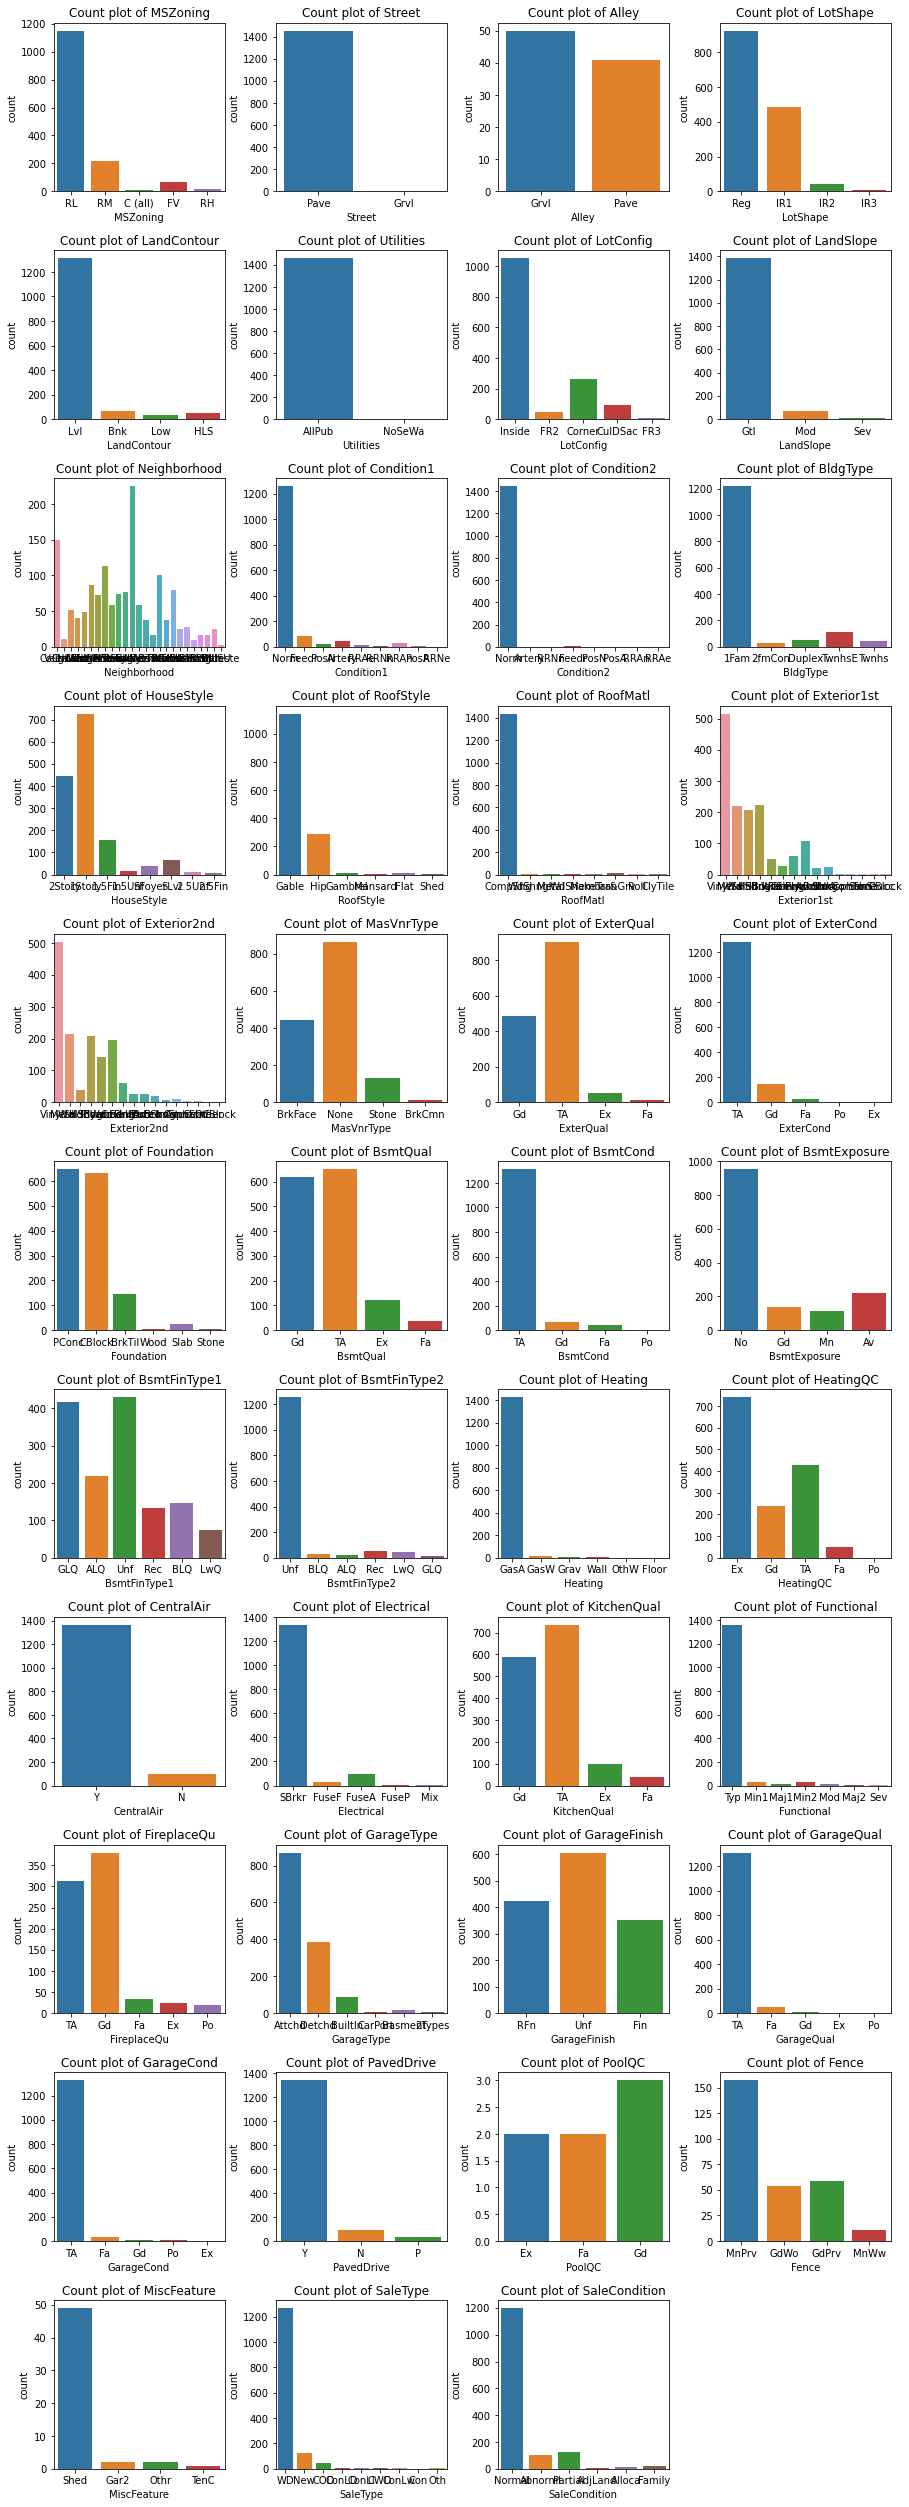

In [23]:
#Count plot for the various categorical features
plt.figure(figsize=(15,45))
plt.subplots_adjust(hspace=0.35, wspace=0.3)


for feature in enumerate(cat_features):
    plt.subplot(11,4,feature[0]+1)
    sns.countplot(x = data[feature[1]], data = data)
    plt.title('Count plot of '+ feature[1])

There are many features where one single category dominated the counts, thus these might not be useful for a linear regression model. 

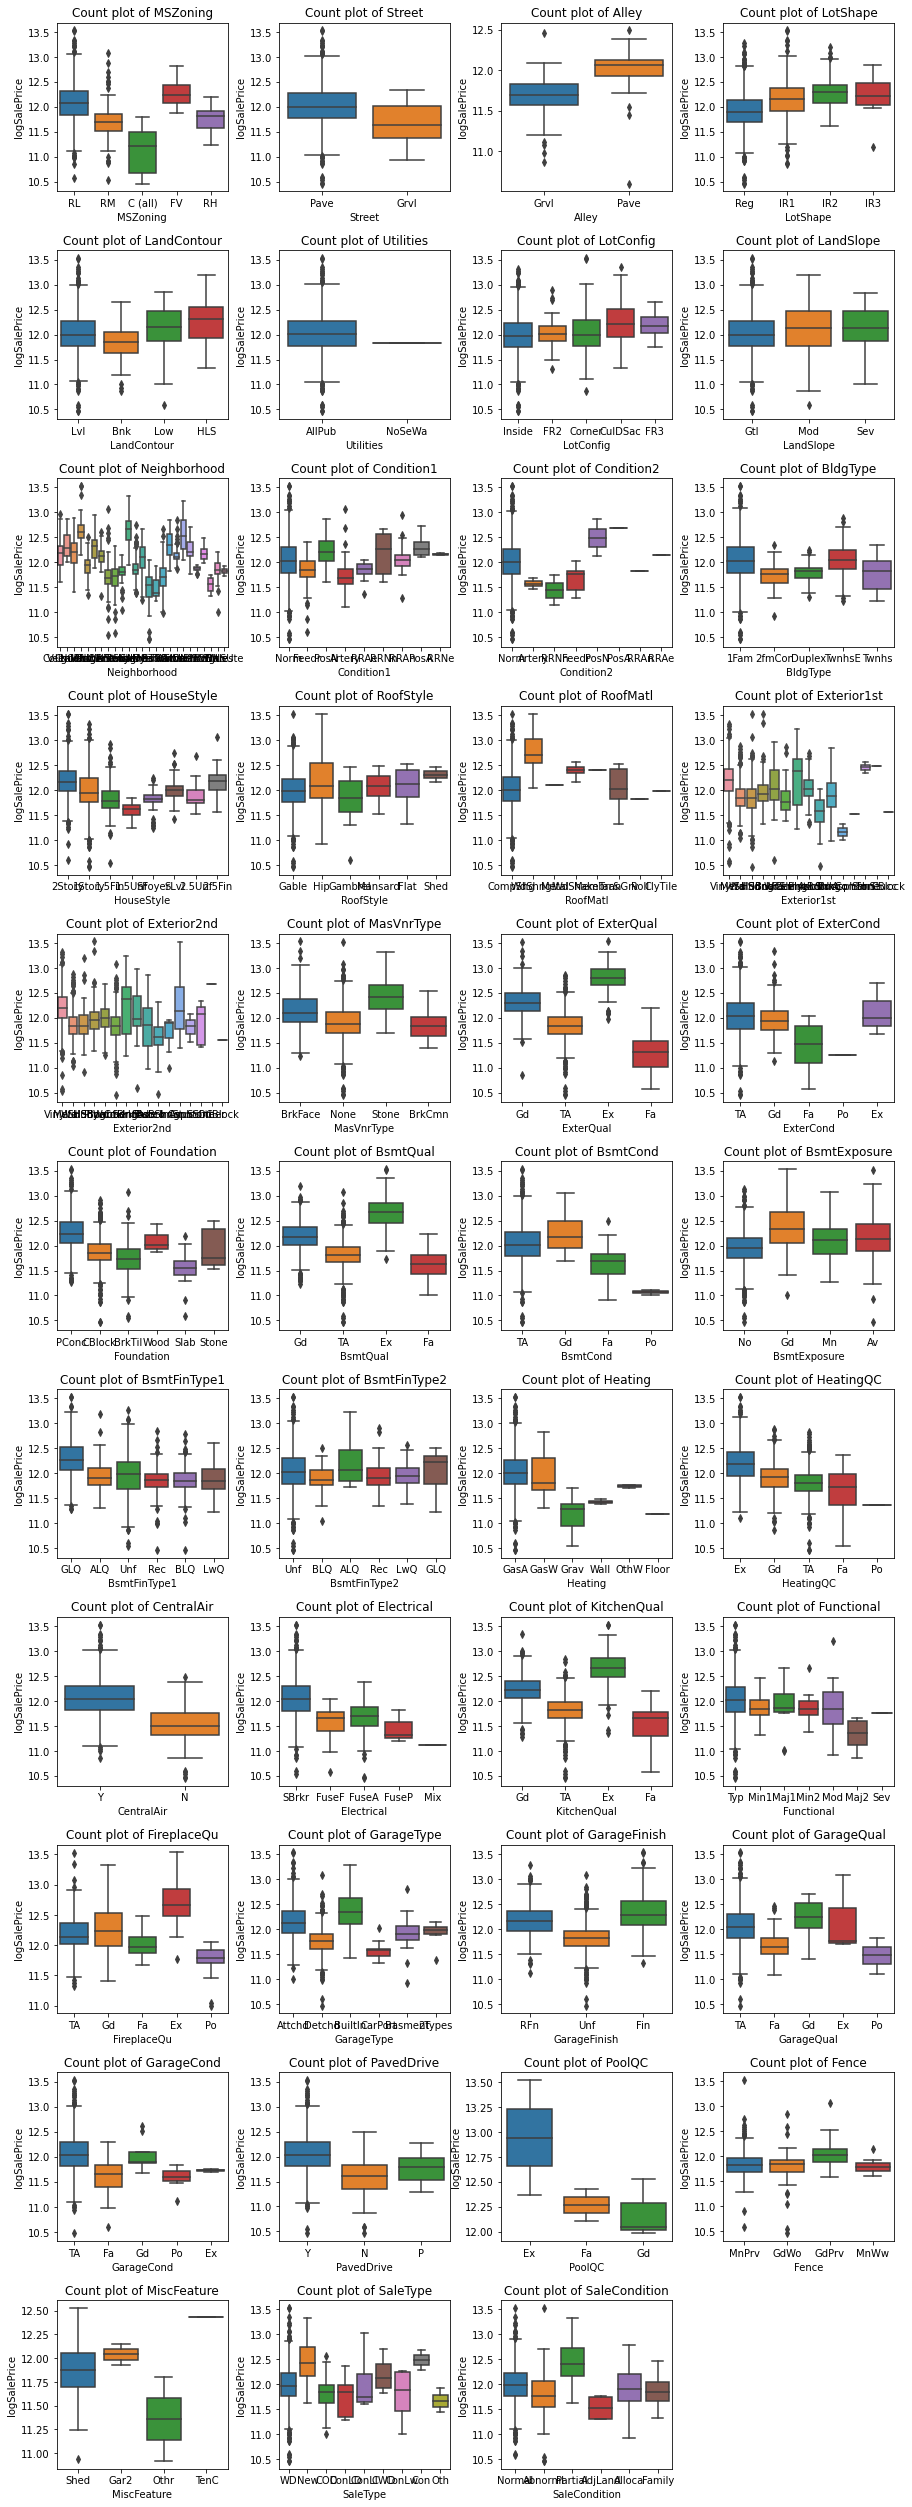

In [24]:
plt.figure(figsize=(15,45))
plt.subplots_adjust(hspace=0.35, wspace=0.3)


for feature in enumerate(cat_features):
    plt.subplot(11,4,feature[0]+1)
    sns.boxplot(x = data[feature[1]], y = data['logSalePrice'],data = data)
    plt.title('Count plot of '+ feature[1])

#### <font color='green'>1.7 Outliers</font>

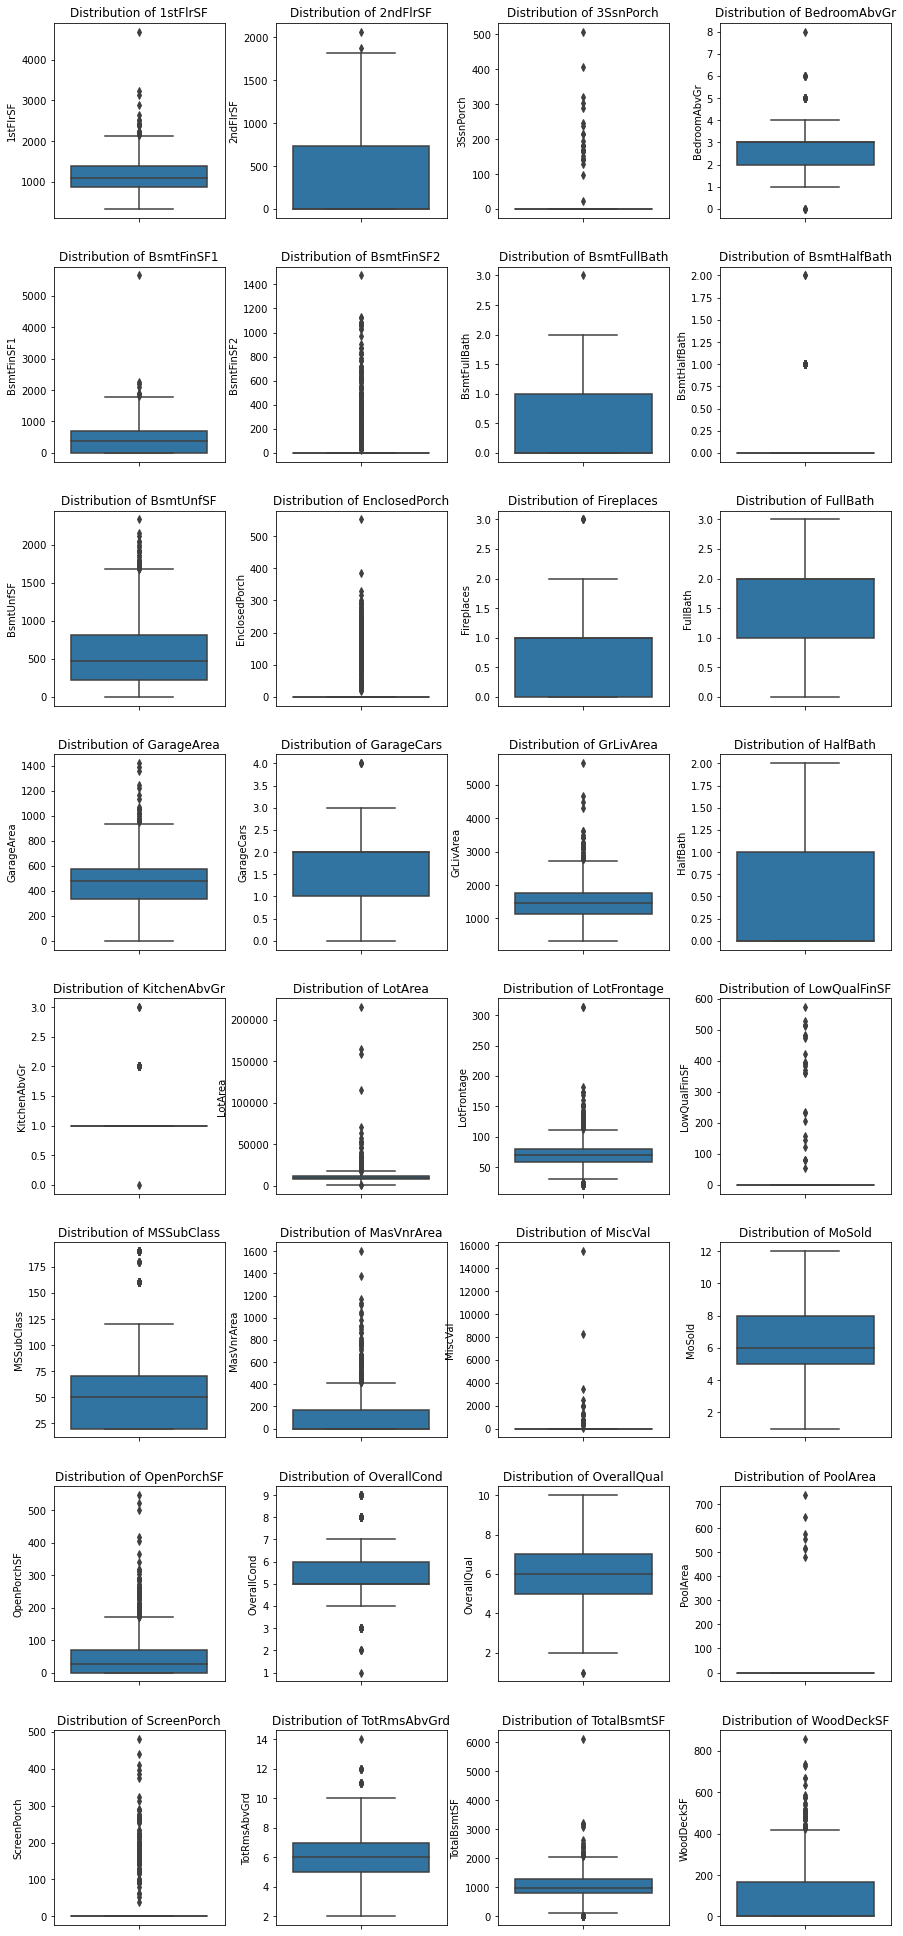

In [25]:
plt.figure(figsize=(15,35))
plt.subplots_adjust(hspace=0.25, wspace=0.3)

for feature in enumerate(num_features):
    plt.subplot(8,4,feature[0]+1)
    sns.boxplot(y = data[feature[1]], data = data)
    plt.title('Distribution of '+ feature[1])

There are a lot of features with outliers which need to normalized or standardized to make the linear regression more robust nad perform better. 

## <font color='Blue'>2. Feature Engineering</font>

In [26]:
#reimport raw data 
data = pd.read_csv('train.csv')
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
#converting SalePrice to logSalePrice
data['SalePrice'] = np.log(data['SalePrice'])

#### <font color='green'>2.1 Dealing with high null values</font>

<AxesSubplot:>

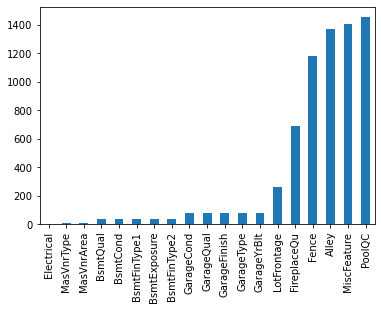

In [28]:
#getting null values
null_val = data.isnull().sum()
null_val = null_val[null_val > 0]
null_val.sort_values(inplace = True)
null_val.plot.bar()

FireplaceQu, Fence, Alley, MiscFeature, PoolQC have an overwhelming number of null values, looking at the 

#dropping feature that have high null values and also the unuseful feature Id
high_null = ['FireplaceQu','Fence','Alley','PoolQC','MiscFeature','Id']
data.drop(columns = high_null, inplace = True)
print(data.shape)

For the rest of the features with null values, some are numerical and others are categorical and both must be delt with using different ways. 

#### <font color='green'>2.2 Categorical Feature Engineering</font>

In [29]:
#filtering the categorical features that have null values
cat_with_nan = [feature for feature in data.columns if data[feature].isnull().sum()>0 and data[feature].dtypes == 'O']
cat_with_nan

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [30]:
cat_null_val = data[cat_with_nan].isnull().sum()
cat_null_val

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

FireplaceQu, Fence, Alley, MiscFeature, PoolQC have an overwhelming number of null values, but all these values are supposed to be None according to the data discription file.  these values seem to systematic, i.e. 81 for GarageType, GarageFinish and GarageCond it would be better to create a new category for this data rather than imputing with mode or something else

In [31]:
data[cat_with_nan]=data[cat_with_nan].fillna('None')
data[cat_with_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

As identified in the EDA process, there were quite a few features that were dominated by 1 single category. Such features are quite unhelpful in a linear regression model, therefore it is better to just drop these features

In [32]:
#get updated categorical features
cat_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

In [33]:
#for loop to traverse through the feature to find features which have a single category at greater than 85%
low_var = []
for feature in cat_features:
    for i in range(len(data[feature].value_counts())):
        percent = data[feature].value_counts()[i]/1460
        if percent > 0.9:
            low_var = np.append(low_var, feature)

In [34]:
#printing the output of the loop
print('There are', len(low_var),'low variance categorical variables')
low_var

There are 14 low variance categorical variables


array(['Street', 'Alley', 'Utilities', 'LandSlope', 'Condition2',
       'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'Functional',
       'GarageCond', 'PavedDrive', 'PoolQC', 'MiscFeature'], dtype='<U32')

In [35]:
data.drop(columns = low_var, inplace = True)
data.shape

(1460, 67)

In [36]:
#get updated categorical features
cat_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

In [37]:
ordinal_features = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','BsmtQual', 'ExterCond', 'ExterQual', 'Fence', 
                    'FireplaceQu','GarageQual', 'HeatingQC', 'KitchenQual', 'LandContour','LotShape']

In [38]:
nominal_features = np.setdiff1d(cat_features,ordinal_features)


In [39]:
nominal_features

array(['BldgType', 'Condition1', 'Exterior1st', 'Exterior2nd',
       'Foundation', 'GarageFinish', 'GarageType', 'HouseStyle',
       'LotConfig', 'MSZoning', 'MasVnrType', 'Neighborhood', 'RoofStyle',
       'SaleCondition', 'SaleType'], dtype='<U13')

In [40]:
from sklearn.preprocessing import OrdinalEncoder

In [41]:
data[ordinal_features].head()

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,ExterCond,ExterQual,Fence,FireplaceQu,GarageQual,HeatingQC,KitchenQual,LandContour,LotShape
0,TA,No,GLQ,Unf,Gd,TA,Gd,None,None,TA,Ex,Gd,Lvl,Reg
1,TA,Gd,ALQ,Unf,Gd,TA,TA,None,TA,TA,Ex,TA,Lvl,Reg
2,TA,Mn,GLQ,Unf,Gd,TA,Gd,None,TA,TA,Ex,Gd,Lvl,IR1
3,Gd,No,ALQ,Unf,TA,TA,TA,None,Gd,TA,Gd,Gd,Lvl,IR1
4,TA,Av,GLQ,Unf,Gd,TA,Gd,None,TA,TA,Ex,Gd,Lvl,IR1


In [42]:
for feature in ordinal_features:
    print(feature, 'has', data[feature].unique())

BsmtCond has ['TA' 'Gd' 'None' 'Fa' 'Po']
BsmtExposure has ['No' 'Gd' 'Mn' 'Av' 'None']
BsmtFinType1 has ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']
BsmtFinType2 has ['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ']
BsmtQual has ['Gd' 'TA' 'Ex' 'None' 'Fa']
ExterCond has ['TA' 'Gd' 'Fa' 'Po' 'Ex']
ExterQual has ['Gd' 'TA' 'Ex' 'Fa']
Fence has ['None' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
FireplaceQu has ['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageQual has ['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po']
HeatingQC has ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual has ['Gd' 'TA' 'Ex' 'Fa']
LandContour has ['Lvl' 'Bnk' 'Low' 'HLS']
LotShape has ['Reg' 'IR1' 'IR2' 'IR3']


In [43]:
ord_encod = OrdinalEncoder(categories = [['None','Po','Fa','TA','Gd','Ex'], ['None','No','Mn','Av','Gd'], 
                                         ['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'], 
                                         ['None','Unf','LwQ','Rec','BLQ','ALQ','GLQ'], 
                                         ['None','Po','Fa','TA','Gd','Ex'], ['None','Po','Fa','TA','Gd','Ex'], 
                                         ['None','Po','Fa','TA','Gd','Ex'], ['None','MnWw','GdWo','MnPrv','GdPrv'], 
                                         ['None','Po','Fa','TA','Gd','Ex'], ['None','Po','Fa','TA','Gd','Ex'], 
                                         ['None','Po','Fa','TA','Gd','Ex'], ['None','Po','Fa','TA','Gd','Ex'],
                                         ['Low','HLS','Bnk','Lvl'],['IR3','IR2','IR1','Reg']])

In [44]:
ord_encod.fit(data[ordinal_features])

OrdinalEncoder(categories=[['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['None', 'No', 'Mn', 'Av', 'Gd'],
                           ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                           ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                           ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
                           ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                           ['Low', 'HLS', 'Bnk', 'Lvl'],
                           ['IR3', 'IR2', 'IR1', 'Reg']])

In [45]:
data[ordinal_features].head()

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,ExterCond,ExterQual,Fence,FireplaceQu,GarageQual,HeatingQC,KitchenQual,LandContour,LotShape
0,TA,No,GLQ,Unf,Gd,TA,Gd,None,None,TA,Ex,Gd,Lvl,Reg
1,TA,Gd,ALQ,Unf,Gd,TA,TA,None,TA,TA,Ex,TA,Lvl,Reg
2,TA,Mn,GLQ,Unf,Gd,TA,Gd,None,TA,TA,Ex,Gd,Lvl,IR1
3,Gd,No,ALQ,Unf,TA,TA,TA,None,Gd,TA,Gd,Gd,Lvl,IR1
4,TA,Av,GLQ,Unf,Gd,TA,Gd,None,TA,TA,Ex,Gd,Lvl,IR1


In [46]:
data[ordinal_features] = ord_encod.transform(data[ordinal_features])

In [47]:
data[ordinal_features].head()

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,ExterCond,ExterQual,Fence,FireplaceQu,GarageQual,HeatingQC,KitchenQual,LandContour,LotShape
0,3.0,1.0,6.0,1.0,4.0,3.0,4.0,0.0,0.0,3.0,5.0,4.0,3.0,3.0
1,3.0,4.0,5.0,1.0,4.0,3.0,3.0,0.0,3.0,3.0,5.0,3.0,3.0,3.0
2,3.0,2.0,6.0,1.0,4.0,3.0,4.0,0.0,3.0,3.0,5.0,4.0,3.0,2.0
3,4.0,1.0,5.0,1.0,3.0,3.0,3.0,0.0,4.0,3.0,4.0,4.0,3.0,2.0
4,3.0,3.0,6.0,1.0,4.0,3.0,4.0,0.0,3.0,3.0,5.0,4.0,3.0,2.0


As one hot encoding would be used on these categorical features it is important to understand how many categories there are going to be i.e. how many new dummy columns woud be appended

In [48]:
#get updated categorical features
cat_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

In [49]:
total_count = 0
for feature in nominal_features:
    count = len(data[feature].unique())
    print(feature, 'has', count , 'unique values')
    total_count = count + total_count
    
print('Total no. of unique values is', total_count)

BldgType has 5 unique values
Condition1 has 9 unique values
Exterior1st has 15 unique values
Exterior2nd has 16 unique values
Foundation has 6 unique values
GarageFinish has 4 unique values
GarageType has 7 unique values
HouseStyle has 8 unique values
LotConfig has 5 unique values
MSZoning has 5 unique values
MasVnrType has 4 unique values
Neighborhood has 25 unique values
RoofStyle has 6 unique values
SaleCondition has 6 unique values
SaleType has 9 unique values
Total no. of unique values is 130


Converting these features into one hot encoding would create 147 new columns which is not ideal for any linear regression model therefore it would be better to convert some of the more rare categories into a single category of their own

In [50]:
#convert categories that are less than 5% into rare category
for feature in nominal_features:
    values = data.groupby(feature)['SalePrice'].count()/len(data)
    values_df = values[values > 0.05].index
    data[feature] = np.where(data[feature].isin(values_df), data[feature],'Rare')

In [51]:
#finding the new no. of unique values
total_count = 0
for feature in nominal_features:
    count = len(data[feature].unique())
    print(feature, 'has', count , 'unique values')
    total_count = count + total_count
    
print('Total no. of unique values is', total_count)

BldgType has 3 unique values
Condition1 has 3 unique values
Exterior1st has 6 unique values
Exterior2nd has 6 unique values
Foundation has 4 unique values
GarageFinish has 4 unique values
GarageType has 5 unique values
HouseStyle has 4 unique values
LotConfig has 4 unique values
MSZoning has 3 unique values
MasVnrType has 4 unique values
Neighborhood has 9 unique values
RoofStyle has 3 unique values
SaleCondition has 4 unique values
SaleType has 3 unique values
Total no. of unique values is 65


The no. of unique value was reduced from 147 to 89. But 89 is still a large number of features for a linear regression model therefore further removal of unnecessary feature is also required.

In [52]:
#one hot encoding for categorical variables
dummies = pd.get_dummies(data[nominal_features], drop_first=True)
dummies.head()

,BldgType_Rare,BldgType_TwnhsE,Condition1_Norm,Condition1_Rare,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Foundation_CBlock,Foundation_PConc,Foundation_Rare,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Rare,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Rare,MSZoning_RM,MSZoning_Rare,MasVnrType_None,MasVnrType_Rare,MasVnrType_Stone,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare,Neighborhood_Sawyer,Neighborhood_Somerst,RoofStyle_Hip,RoofStyle_Rare,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare,SaleType_Rare,SaleType_WD
0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


#### <font color='green'>2.3 Numerical Feature Engineering</font>

In [53]:
#filtering the numerical features that have null values
num_with_nan = [feature for feature in data.columns if data[feature].isnull().sum()>0 and data[feature].dtypes != 'O']
num_with_nan

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [54]:
num_null_val = data[num_with_nan].isnull().sum()
num_null_val

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

Imputing these values with the median rather than mean would make it more robust to the outliers in the data

In [55]:
for feature in num_with_nan:
    median = data[feature].median()
    data[feature].fillna(median, inplace = True)

data[num_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

There were also many numerical features that had skewed distributions that must be transformed to yield better results for a model

In [56]:
has_zero = []
for feature in num_features:
    if (0 in data[feature].unique()):
        has_zero = np.append(has_zero, feature)
print('There are', len(has_zero), 'features with 0 in their values')

There are 23 features with 0 in their values


In [57]:
high_zero = []
for feature in has_zero:
    percent = data[feature].value_counts()[0]/1460
    if percent > 0.90:
        high_zero = np.append(high_zero, feature)

print(high_zero)

['3SsnPorch' 'BsmtHalfBath' 'LowQualFinSF' 'MiscVal' 'PoolArea'
 'ScreenPorch']


In [58]:
log_features = ['1stFlrSF','GarageArea','GrLivArea','LotArea','LotFrontage','TotalBsmtSF']

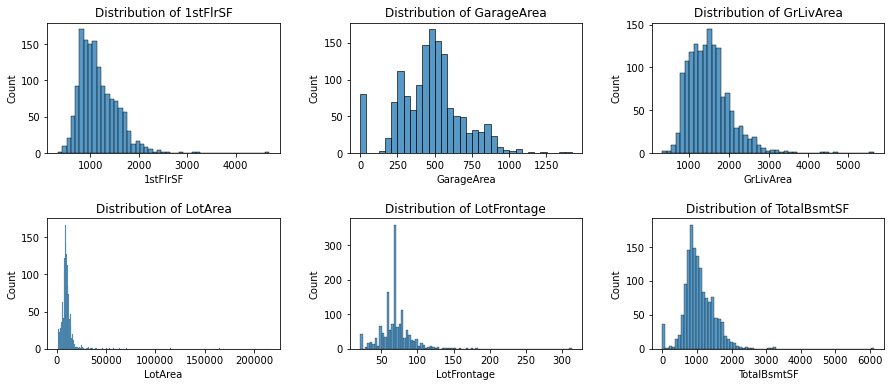

In [59]:
#plotting the different skewed distributions 
plt.figure(figsize=(15,6))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for feature in enumerate(log_features):
    plt.subplot(2,3,feature[0]+1)
    sns.histplot(data[feature[1]])
    plt.title('Distribution of '+ feature[1])

In [60]:
has_zero = []
no_zero = []
for feature in log_features:
    if (0 in data[feature].unique()):
        print(feature, 'has zero values')
        has_zero = np.append(has_zero, feature)
    else:
        print(feature, 'does not have zero values')
        no_zero = np.append(no_zero, feature)

1stFlrSF does not have zero values
GarageArea has zero values
GrLivArea does not have zero values
LotArea does not have zero values
LotFrontage does not have zero values
TotalBsmtSF has zero values


In [61]:
print('Columns which have zeros are',has_zero)
print('Columns which do not have zeros are',no_zero)

Columns which have zeros are ['GarageArea' 'TotalBsmtSF']
Columns which do not have zeros are ['1stFlrSF' 'GrLivArea' 'LotArea' 'LotFrontage']


As log(0) is undefined, columns that have '0' values would return nothing when a log transform would be applied, therefore it would be better to replace '0' with 1 so that when a log transformation is performed these values go back to 0 as log(1) = 0

In [62]:
#replacing 0 with 1 in columns which have 0 
for feature in has_zero:
    data[feature] = data[feature].replace(0, 1)

In [63]:
#transforming to log
for feature in log_features:
    data[feature] = np.log(data[feature])

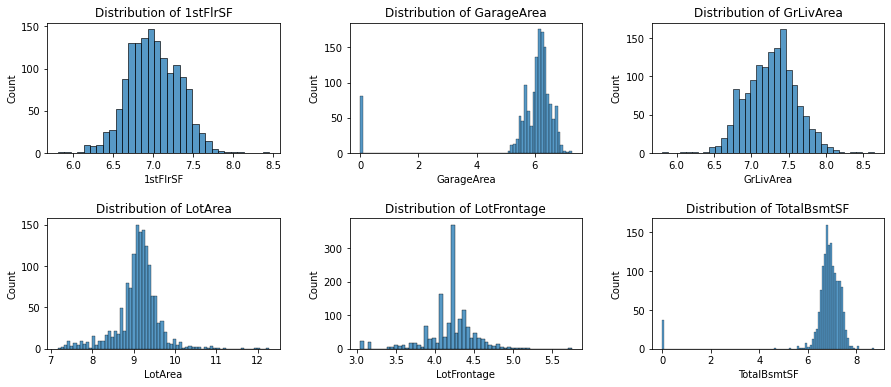

In [64]:
#plotting new distribution of log features
#plotting the different skewed distributions 
plt.figure(figsize=(15,6))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for feature in enumerate(log_features):
    plt.subplot(2,3,feature[0]+1)
    sns.histplot(data[feature[1]])
    plt.title('Distribution of '+ feature[1])

#### <font color='green'>2.4 Temporal Feature Engineering</font>

In [65]:
for feature in temp_features:
    print('Minimmum value for', feature , 'is', data[feature].min())

Minimmum value for YearBuilt is 1872
Minimmum value for YearRemodAdd is 1950
Minimmum value for GarageYrBlt is 1900.0
Minimmum value for YrSold is 2006


In [66]:
for feature in temp_features:
    data[feature] = data[feature] - data[feature].min()

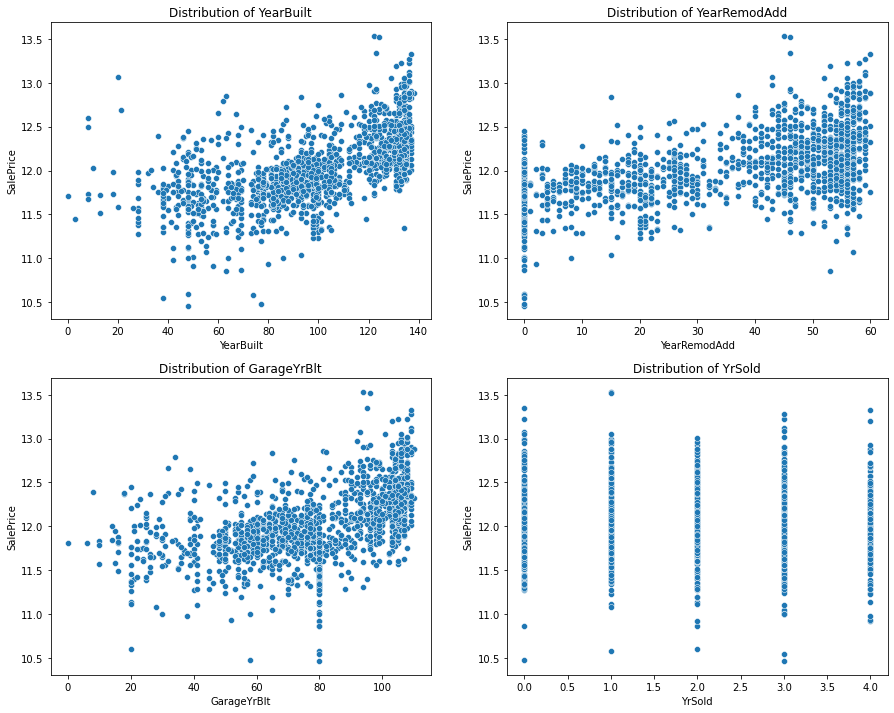

In [67]:
#plotting the new scatterplots
plt.figure(figsize=(15,12))  

for feature in enumerate(temp_features):
    plt.subplot(2,2,feature[0]+1)
    sns.scatterplot(x = data[feature[1]], y = data['SalePrice'], data = data)
    plt.title('Distribution of '+ feature[1])

#### <font color='green'>2.5 Numerica Feature Scaling</font>

In [68]:
#adding temporal features to numerical features
num_features = np.append(num_features, temp_features)
data[num_features].head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,6.752270,854,0,3,706,0,1,0,150,0,0,2,6.306275,2,7.444249,1,1,9.041922,4.174387,0,60,196.0,0,2,61,5,7,0,0,8,6.752270,0,131,53,103.0,2
1,7.140453,0,0,3,978,0,0,1,284,0,1,2,6.131226,2,7.140453,0,1,9.169518,4.382027,0,20,0.0,0,5,0,8,6,0,0,6,7.140453,298,104,26,76.0,1
2,6.824374,866,0,3,486,0,1,0,434,0,1,2,6.410175,2,7.487734,1,1,9.328123,4.219508,0,60,162.0,0,9,42,5,7,0,0,6,6.824374,0,129,52,101.0,2
3,6.867974,756,0,3,216,0,1,0,540,272,1,1,6.464588,3,7.448334,0,1,9.164296,4.094345,0,70,0.0,0,2,35,5,7,0,0,7,6.628041,0,43,20,98.0,0
4,7.043160,1053,0,4,655,0,1,0,490,0,1,2,6.728629,3,7.695303,1,1,9.565214,4.430817,0,60,350.0,0,12,84,5,8,0,0,9,7.043160,192,128,50,100.0,2


In [69]:
print(len(num_features))

36


In [70]:
#applying min-max scaler to remove outliers
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[num_features])

MinMaxScaler()

In [71]:
data[num_features]= scaler.transform(data[num_features])

In [72]:
data[num_features].head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,0.356155,0.413559,0.0,0.375,0.125089,0.0,0.333333,0.0,0.064212,0.000000,0.000000,0.666667,0.868992,0.50,0.577712,0.5,0.333333,0.366344,0.418208,0.0,0.235294,0.12250,0.0,0.090909,0.111517,0.500,0.666667,0.0,0.0,0.500000,0.774549,0.000000,0.949275,0.883333,0.936364,0.50
1,0.503056,0.000000,0.0,0.375,0.173281,0.0,0.000000,0.5,0.121575,0.000000,0.333333,0.666667,0.844870,0.50,0.470245,0.0,0.333333,0.391317,0.495064,0.0,0.000000,0.00000,0.0,0.363636,0.000000,0.875,0.555556,0.0,0.0,0.333333,0.819077,0.347725,0.753623,0.433333,0.690909,0.25
2,0.383441,0.419370,0.0,0.375,0.086109,0.0,0.333333,0.0,0.185788,0.000000,0.333333,0.666667,0.883309,0.50,0.593095,0.5,0.333333,0.422359,0.434909,0.0,0.235294,0.10125,0.0,0.727273,0.076782,0.500,0.666667,0.0,0.0,0.333333,0.782820,0.000000,0.934783,0.866667,0.918182,0.50
3,0.399941,0.366102,0.0,0.375,0.038271,0.0,0.333333,0.0,0.231164,0.492754,0.333333,0.333333,0.890807,0.75,0.579157,0.0,0.333333,0.390295,0.388581,0.0,0.294118,0.00000,0.0,0.090909,0.063985,0.500,0.666667,0.0,0.0,0.416667,0.760299,0.000000,0.311594,0.333333,0.890909,0.00
4,0.466237,0.509927,0.0,0.500,0.116052,0.0,0.333333,0.0,0.209760,0.000000,0.333333,0.666667,0.927191,0.75,0.666523,0.5,0.333333,0.468761,0.513123,0.0,0.235294,0.21875,0.0,1.000000,0.153565,0.500,0.777778,0.0,0.0,0.583333,0.807917,0.224037,0.927536,0.833333,0.909091,0.50


In [73]:
print(data.shape)
print(data[nominal_features].shape)

(1460, 67)
(1460, 15)


In [74]:
data.drop(columns = nominal_features, inplace = True)

In [75]:
print(dummies.shape)

(1460, 50)


In [76]:
data = pd.concat([data, dummies], axis = 1)
print(data.shape)

(1460, 102)


In [77]:
data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SalePrice,BldgType_Rare,BldgType_TwnhsE,Condition1_Norm,Condition1_Rare,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Foundation_CBlock,Foundation_PConc,Foundation_Rare,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Rare,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Rare,MSZoning_RM,MSZoning_Rare,MasVnrType_None,MasVnrType_Rare,MasVnrType_Stone,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare,Neighborhood_Sawyer,Neighborhood_Somerst,RoofStyle_Hip,RoofStyle_Rare,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare,SaleType_Rare,SaleType_WD
0,1,0.235294,0.418208,0.366344,3.0,3.0,0.666667,0.500,0.949275,0.883333,0.12250,4.0,3.0,4.0,3.0,1.0,6.0,0.125089,1.0,0.0,0.064212,0.774549,5.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,4.0,0.500000,0.000000,0.0,0.936364,0.50,0.868992,3.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,12.247694,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,2,0.000000,0.495064,0.391317,3.0,3.0,0.555556,0.875,0.753623,0.433333,0.00000,3.0,3.0,4.0,3.0,4.0,5.0,0.173281,1.0,0.0,0.121575,0.819077,5.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,3.0,0.333333,0.333333,3.0,0.690909,0.50,0.844870,3.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.363636,0.25,12.109011,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,3,0.235294,0.434909,0.422359,2.0,3.0,0.666667,0.500,0.934783,0.866667,0.10125,4.0,3.0,4.0,3.0,2.0,6.0,0.086109,1.0,0.0,0.185788,0.782820,5.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,4.0,0.333333,0.333333,3.0,0.918182,0.50,0.883309,3.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,12.317167,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,4,0.294118,0.388581,0.390295,2.0,3.0,0.666667,0.500,0.311594,0.333333,0.00000,3.0,3.0,3.0,4.0,1.0,5.0,0.038271,1.0,0.0,0.231164,0.760299,4.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,4.0,0.416667,0.333333,4.0,0.890909,0.75,0.890807,3.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.0,0.090909,0.00,11.849398,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,5,0.235294,0.513123,0.468761,2.0,3.0,0.777778,0.500,0.927536,0.833333,0.21875,4.0,3.0,4.0,3.0,3.0,6.0,0.116052,1.0,0.0,0.209760,0.807917,5.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,4.0,0.583333,0.333333,3.0,0.909091,0.75,0.927191,3.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.50,12.429216,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [78]:
X = data.drop(columns = ['SalePrice'])
y = data['SalePrice']

In [79]:
corr = data.corr()
corr.sort_values(['SalePrice'], ascending = False , inplace = True)
corr_SalePrice = pd.DataFrame(data = corr.SalePrice)
corr_SalePrice.reset_index(inplace = True)
corr_SalePrice.rename(columns = {'index': 'Feature', 'SalePrice':'Correlation'}, inplace = True)
corr_SalePrice.head()

,Feature,Correlation
0,SalePrice,1.000000
1,OverallQual,0.817184
2,GrLivArea,0.730255
3,GarageCars,0.680625
4,ExterQual,0.678840


<AxesSubplot:xlabel='Correlation', ylabel='Feature'>

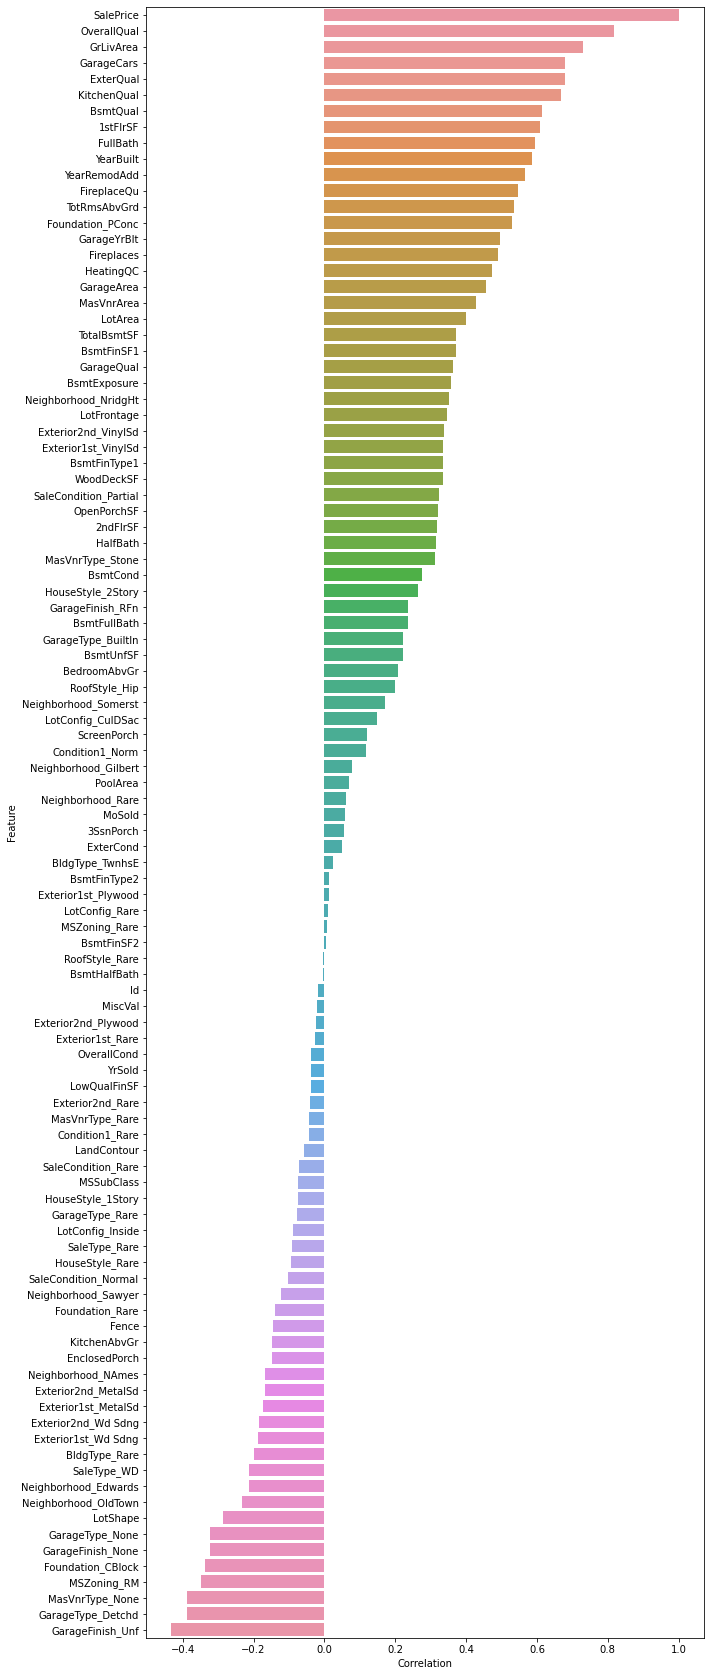

In [80]:
plt.figure(figsize = (10,30))
sns.barplot(x = 'Correlation', y = 'Feature', data = corr_SalePrice)

In [81]:
low_corr = corr_SalePrice[corr_SalePrice['Correlation'] > -0.05]
low_corr = low_corr[low_corr['Correlation'] < 0.05]

In [82]:
print(low_corr.shape)
low_corr

(19, 2)


,Feature,Correlation
52,ExterCond,0.049314
53,BldgType_TwnhsE,0.025800
54,BsmtFinType2,0.014034
55,Exterior1st_Plywood,0.012151
56,LotConfig_Rare,0.011108
57,MSZoning_Rare,0.007247
58,BsmtFinSF2,0.004832
59,RoofStyle_Rare,-0.004595
60,BsmtHalfBath,-0.005149
61,Id,-0.017942


In [83]:
print(X.shape) 
X.drop(columns = low_corr['Feature'], inplace = True)
print(X.shape)

(1460, 101)
(1460, 82)


In [84]:
num_features = np.setdiff1d(num_features,low_corr['Feature'])

In [85]:
from sklearn.feature_selection import mutual_info_regression

In [86]:
mutual_info = mutual_info_regression(X, y)
mutual_info

array([0.27321364, 0.21636703, 0.2001703 , 0.08796544, 0.02944174,
       0.56960698, 0.36255022, 0.24087741, 0.08957043, 0.33186844,
       0.32300513, 0.05230043, 0.0845011 , 0.14759983, 0.14006628,
       0.12561493, 0.34678649, 0.17227334, 0.30072543, 0.19630546,
       0.47834555, 0.02967767, 0.26040618, 0.08698747, 0.06684558,
       0.01873911, 0.31588773, 0.21699381, 0.17531428, 0.21749729,
       0.28360195, 0.36891263, 0.33676026, 0.06927238, 0.10186718,
       0.15545618, 0.02585171, 0.        , 0.01523947, 0.00306133,
       0.04554516, 0.        , 0.02185649, 0.        , 0.01546758,
       0.08641946, 0.03321662, 0.02075723, 0.09517908, 0.03624772,
       0.09810121, 0.18141185, 0.01455436, 0.05610233, 0.08587033,
       0.14611669, 0.01964292, 0.10218962, 0.0532302 , 0.        ,
       0.        , 0.04837145, 0.02060391, 0.0197982 , 0.00545659,
       0.07490754, 0.07946147, 0.05202403, 0.02252227, 0.04268583,
       0.07248498, 0.06304364, 0.03011061, 0.02046085, 0.02162

In [87]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending = False)

OverallQual           0.569607
GrLivArea             0.478346
GarageCars            0.368913
YearBuilt             0.362550
TotalBsmtSF           0.346786
                        ...   
Condition1_Norm       0.000000
HouseStyle_1Story     0.000000
GarageType_Rare       0.000000
SaleCondition_Rare    0.000000
MoSold                0.000000
Length: 82, dtype: float64

<AxesSubplot:>

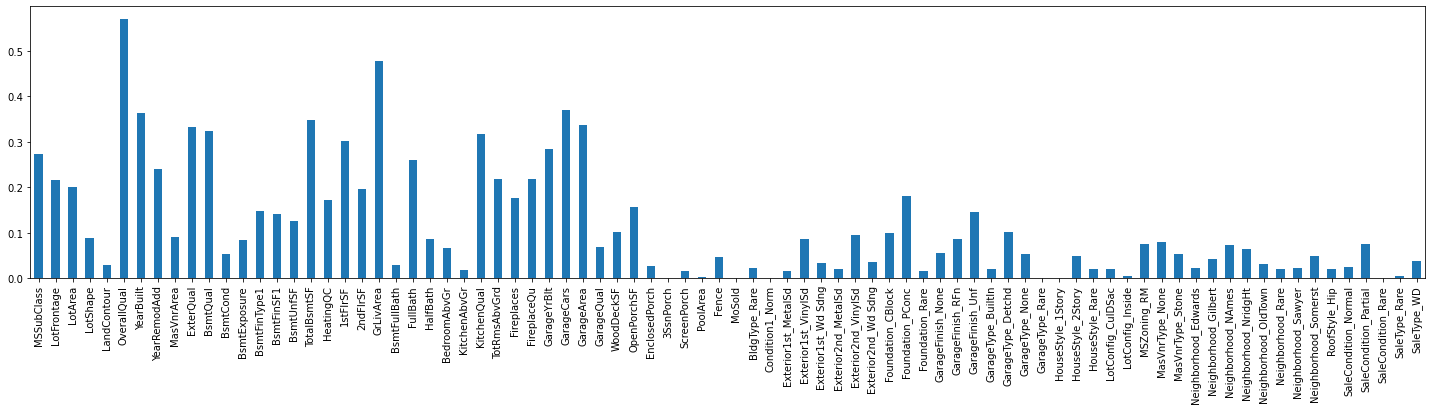

In [88]:
mutual_info.plot.bar(figsize = (25,5))

In [89]:
low_mutual = mutual_info[mutual_info < 0.02]
print(len(low_mutual))
low_mutual

15


KitchenAbvGr           0.018739
3SsnPorch              0.000000
ScreenPorch            0.015239
PoolArea               0.003061
MoSold                 0.000000
Condition1_Norm        0.000000
Exterior1st_MetalSd    0.015468
Foundation_Rare        0.014554
GarageType_BuiltIn     0.019643
GarageType_Rare        0.000000
HouseStyle_1Story      0.000000
LotConfig_CulDSac      0.019798
LotConfig_Inside       0.005457
SaleCondition_Rare     0.000000
SaleType_Rare          0.003719
dtype: float64

In [90]:
print(X.shape)
X.drop(columns = low_mutual.index, inplace = True)
print(X.shape)

(1460, 82)
(1460, 67)


In [91]:
num_features = np.setdiff1d(num_features,low_mutual.index)

In [92]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [93]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.0005))
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.0005))

In [94]:
feature_sel_model.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True, False,  True,  True, False, False,
        True, False, False,  True,  True, False,  True,  True,  True,
       False,  True,  True, False, False,  True, False,  True, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True])

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
def calculate_vif(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
    
    return (vif)

In [97]:
vif_table = calculate_vif(X[num_features])

<AxesSubplot:xlabel='Features', ylabel='VIF'>

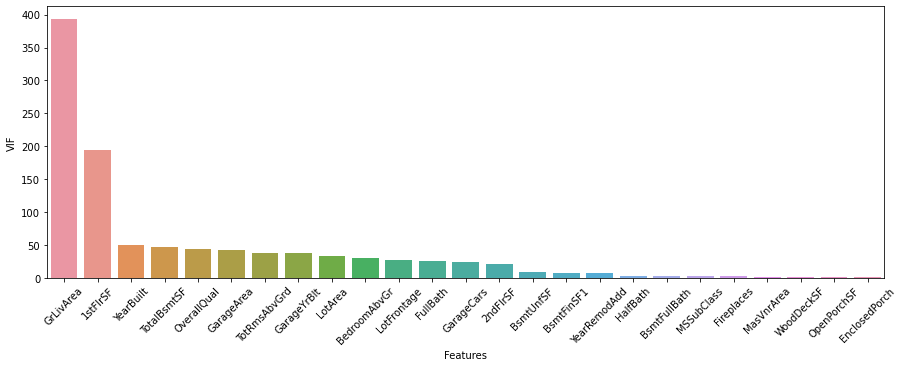

In [98]:
vif_table.sort_values(by = ['VIF'], ascending = False, inplace = True)
plt.figure(figsize = (15,5))
plt.xticks(rotation = 45) 
sns.barplot(x = 'Features', y = 'VIF', data = vif_table)

In [99]:
vif_table

,Features,VIF
12,GrLivArea,392.833971
0,1stFlrSF,194.049383
23,YearBuilt,50.434546
21,TotalBsmtSF,46.802146
19,OverallQual,44.827654
9,GarageArea,41.991323
20,TotRmsAbvGrd,38.529215
11,GarageYrBlt,37.705464
14,LotArea,33.241595
2,BedroomAbvGr,30.161509


In [100]:
X.drop(columns = '1stFlrSF', inplace = True)

In [101]:
num_features = np.delete(num_features, np.where(num_features == 'GrLivArea'))
num_features = np.delete(num_features, np.where(num_features == '1stFlrSF'))

In [102]:
vif_table = calculate_vif(X[num_features])

In [103]:
vif_table.sort_values(by = ['VIF'], ascending = False, inplace = True)
vif_table

,Features,VIF
21,YearBuilt,49.838967
19,TotalBsmtSF,45.686752
17,OverallQual,42.003605
8,GarageArea,39.295612
10,GarageYrBlt,37.202598
18,TotRmsAbvGrd,31.673541
12,LotArea,31.483191
1,BedroomAbvGr,29.253468
13,LotFrontage,27.378999
7,FullBath,24.460572


# Modeling

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
from sklearn.model_selection import cross_val_score

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from numpy import absolute, mean, std
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 42)

In [108]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1460, 66)
(1022, 66)
(438, 66)


In [119]:
reg = LinearRegression()

In [133]:
reg_scores = cross_val_score(reg, X_train, y_train, scoring='r2', cv = 10)

In [134]:
reg_scores

array([0.85532915, 0.89055175, 0.80692324, 0.71487821, 0.88646527,
       0.90042383, 0.85476532, 0.90849118, 0.81514927, 0.90340162])

In [135]:
print(reg_scores.mean())

0.8536378843032256


In [283]:
base_net = ElasticNet(alpha = 0.005)

In [284]:
base_net_scores = cross_val_score(base_net, X_train, y_train, scoring='r2', cv = 10)

In [285]:
print(base_net_scores.mean())

0.8436447969474505


In [275]:
para_grid = {     "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                  "l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [276]:
net = ElasticNet()
hyp_net = GridSearchCV(net, param_grid=para_grid, scoring = 'r2', cv = 10, n_jobs = -1)

In [277]:
hyp_net_scores = hyp_net.fit(X_train, y_train)

In [278]:
print(hyp_net_scores.best_score_)
print(hyp_net_scores.best_params_)

0.863639532924093
{'alpha': 0.001, 'l1_ratio': 0.8}


In [279]:
base_svr = SVR()

In [286]:
base_svr_scores = cross_val_score(base_svr, X_train, y_train, scoring='r2', cv = 10)

In [287]:
print(base_svr_scores.mean())

0.848665966511458


In [297]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear', 'sigmoid']}

In [299]:
svr = SVR()
hyp_svr = RandomizedSearchCV(svr, param_grid, scoring = 'r2', cv = 10, n_jobs = -1)

In [300]:
hyp_svr_scores = hyp_svr.fit(X_train, y_train)

In [301]:
print(hyp_svr_scores.best_score_)
print(hyp_svr_scores.best_params_)

0.8608981495771031
{'kernel': 'sigmoid', 'gamma': 0.0001, 'C': 1000}


In [109]:
base_rf = RandomForestRegressor()

In [123]:
base_rf_scores = cross_val_score(base_rf, X_train, y_train, scoring='neg_mean_squared_error', cv = 10)

In [124]:
print(base_rf_scores.mean())

-0.02347604133504274


In [115]:
param_grid = {'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [136]:
rf = RandomForestRegressor()
hyp_rf = RandomizedSearchCV(rf, param_grid, scoring = 'r2', cv = 10, n_jobs = 4)

In [137]:
hyp_rf_scores = hyp_rf.fit(X_train, y_train)

In [138]:
print(hyp_rf_scores.best_score_)
print(hyp_rf_scores.best_params_)

0.8630855283865042
{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}


In [139]:
base_xgb = xgb.XGBRegressor()

In [140]:
base_xgb_scores = cross_val_score(base_xgb, X_train, y_train, scoring='r2', cv = 10)

In [141]:
print(base_xgb_scores.mean())

0.8415698408488737


In [142]:
param_grid = { 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
           'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.2, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.2, 1.0, 0.1),
           'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [143]:
xgb1 = xgb.XGBRegressor()
hyp_xgb = RandomizedSearchCV(xgb1, param_grid, scoring = 'r2', cv = 10, n_jobs = 4)

In [145]:
hyp_xgb_scores = hyp_xgb.fit(X_train, y_train)

In [146]:
print(hyp_xgb_scores.best_score_)
print(hyp_xgb_scores.best_params_)

0.8799811331063564
{'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.8000000000000003, 'colsample_bylevel': 0.2}


In [157]:
final_net = ElasticNet(alpha= 0.001, l1_ratio= 0.8)
final_svr = SVR(kernel='sigmoid', gamma= 0.0001, C= 1000)
final_rf = RandomForestRegressor(n_estimators= 1400, min_samples_split= 5, min_samples_leaf = 2, max_features = 'sqrt', 
                                 max_depth = 30, bootstrap= False  )
final_xgb = xgb.XGBRegressor(subsample = 0.5, n_estimators = 1000, max_depth = 10, learning_rate = 0.01, colsample_bytree = 0.8, 
                             colsample_bylevel = 0.2)

In [155]:
from sklearn.ensemble import StackingRegressor

In [181]:
estimators = [
    ('ElasticNet', final_net),
    ('svr', final_svr),
    ('rf', final_rf),
    ('xgb', final_xgb)
]

meta_model = Lasso(alpha = 0.005)

In [182]:
stack_model = StackingRegressor(estimators=estimators, final_estimator=meta_model)

In [177]:
tuned_xgb = cross_val_score(final_rf, X_test, y_test, scoring='r2', cv = 10)

In [178]:
print(tuned_xgb.mean())

0.8619029128168686


In [183]:
tuned_stacked = cross_val_score(stack_model, X_test, y_test, scoring='r2', cv = 4)

In [184]:
print(tuned_stacked.mean())

0.8903430131228695
